<a href="https://colab.research.google.com/github/leobonn1/devai/blob/main/iaam_trabalho4_leonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train.columns.isin(test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [5]:
y = train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
X = train.drop('Survived', axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
X.columns.isin(test.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosDesejados(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.atributosIndesejados_ = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    return self
  def transform(self, X, y=None):
    return X.drop(self.atributosIndesejados_, axis=1)

atributosDesejados = AtributosDesejados()
Xdrop = atributosDesejados.fit_transform(X)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosNumericos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.atributosNumericos = X.select_dtypes(include='number').columns
    return self
  def transform(self, X, y=None):
    return X[self.atributosNumericos]

atributosNumericos = AtributosNumericos()
Xnum = atributosNumericos.fit_transform(Xdrop)
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipenum = Pipeline([
    ('atributos_numericos', AtributosNumericos()),
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

XnumLimpo = pipenum.fit_transform(Xdrop)
XnumLimpo

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosCategoricos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.atributosCategoricos = X.select_dtypes(include='object').columns
    return self
  def transform(self, X, y=None):
    return X[self.atributosCategoricos]

atributosCategoricos = AtributosCategoricos()
Xcat = atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

pipecat = Pipeline([
    ('atributos_categoricos', AtributosCategoricos()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [13]:
pipecat.named_steps['encoder'].get_feature_names_out()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [14]:
from sklearn.pipeline import FeatureUnion

unecaracteristicas = FeatureUnion([
    ('pipenum', pipenum),
    ('pipecat', pipecat)
])

Xtratado = unecaracteristicas.fit_transform(Xdrop)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [28]:
from sklearn.pipeline import Pipeline

preproc = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('unecaracteristicas', unecaracteristicas)
])

Xtratado = preproc.fit_transform(X)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

voting = VotingClassifier([
        ('knn', KNeighborsClassifier()),
        ('dtc', DecisionTreeClassifier()),
        ('per', Perceptron())
        ])

stack = StackingClassifier([
    ('voting', voting),
    ('extrat', ExtraTreesClassifier()),
    ('ranfor', RandomForestClassifier(max_depth = 9, n_estimators = 170))
], cv=3, passthrough=True)

In [89]:
from sklearn.metrics import accuracy_score

pipetotal_vote = Pipeline([
    ('preproc', preproc),
    ('voting', voting)
])

pipetotal_vote.fit(X, y)
ypred = pipetotal_vote.predict(X)
accuracy_score(y, ypred)

0.9169472502805837

In [91]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal_vote, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.02028561, 0.01742101, 0.01508665, 0.01483798, 0.01709223]),
  'score_time': array([0.02401185, 0.02205086, 0.02165484, 0.02266455, 0.02363753]),
  'test_score': array([0.79888268, 0.79775281, 0.80898876, 0.80337079, 0.85393258])},
 0.8125855250768941)

In [96]:
from sklearn.metrics import accuracy_score

pipetotal_stack = Pipeline([
    ('preproc', preproc),
    ('stack', stack)
])

pipetotal_stack.fit(X, y)
ypred = pipetotal_stack.predict(X)
accuracy_score(y, ypred)

0.8821548821548821

In [97]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal_stack, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([1.74352407, 1.71058154, 2.16318345, 1.68679404, 1.72265291]),
  'score_time': array([0.04268098, 0.04255533, 0.04201102, 0.04257202, 0.04278898]),
  'test_score': array([0.79888268, 0.83146067, 0.83146067, 0.80898876, 0.83146067])},
 0.8204506936162199)

In [98]:
pipetotal_stack.fit(X, y)
ypred = pipetotal_stack.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('ensemble_stack_2.csv', index=False)

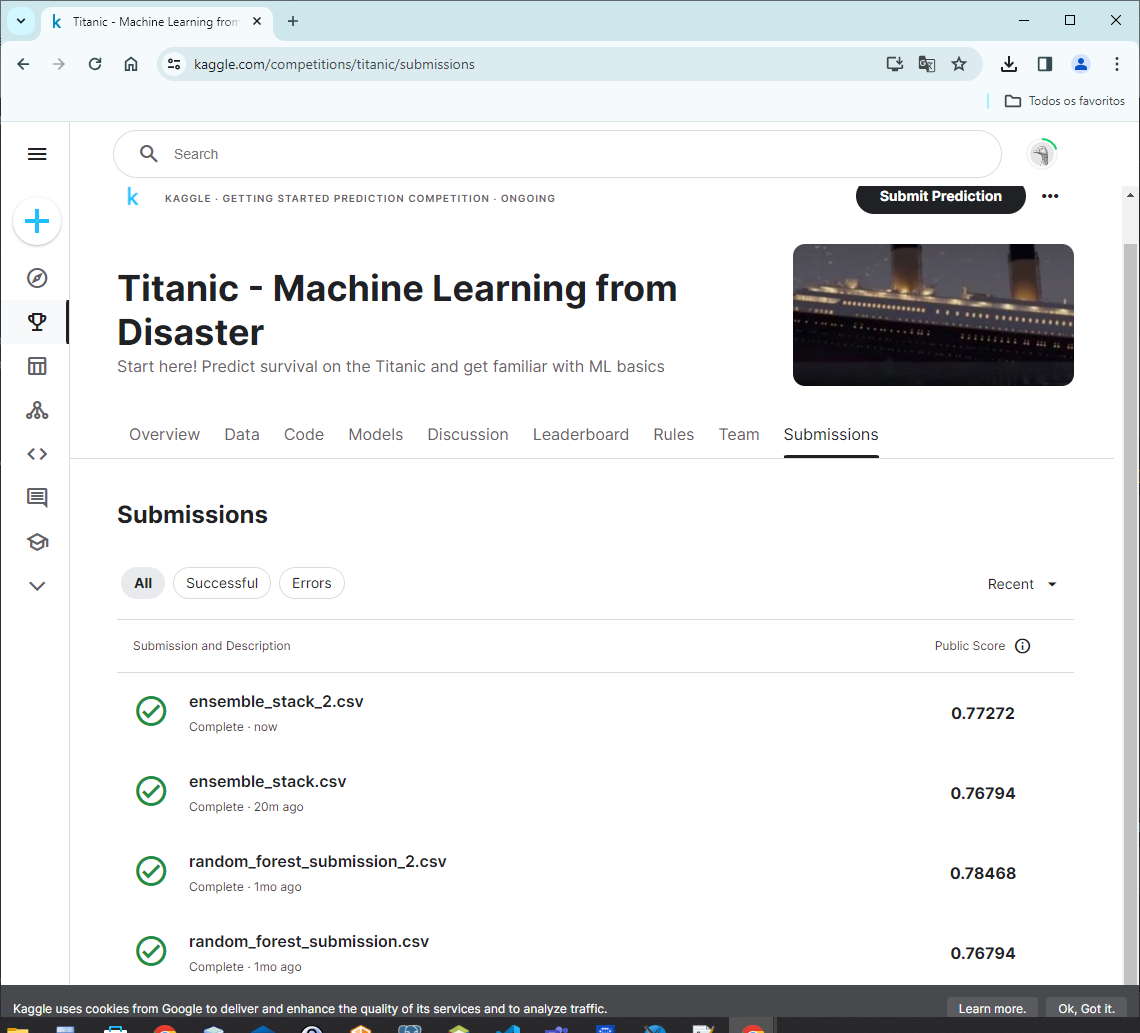